In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ------------------------------------------------------ 훈련데이터
from sklearn.datasets import load_iris
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# -------------------------------------------------------------------------- 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# -------------------------------------------------------------------------- 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# -------------------------------------------------------------------------- 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# -------------------------------------------------------------------------- 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import silhouette_score
# -------------------------------------------------------------------------- 교차검증
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------------------------------
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action="ignore")

In [103]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [104]:
df = pd.DataFrame(data=data["data"], columns=data["feature_names"] )  #index=[]
df.columns = ["sl","sw","pl","pw"]
df['target'] = data["target"]
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

In [105]:
df1 = df.drop('target', axis=1)
df1.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


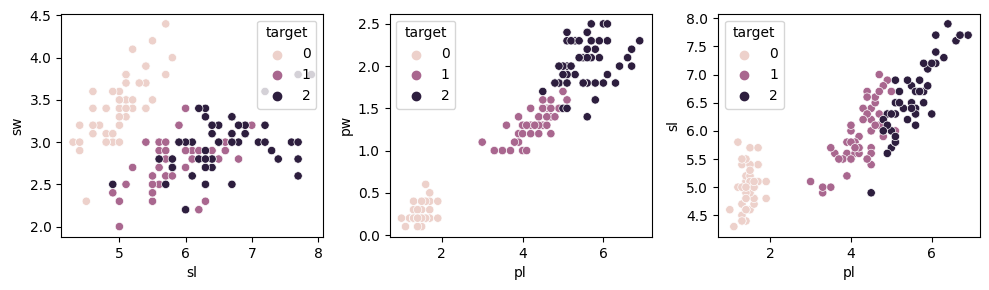

In [106]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.scatterplot(x='sl', y='sw', data=df, hue='target')
plt.subplot(1,3,2)
sns.scatterplot(x='pl', y='pw', data=df, hue='target')
plt.subplot(1,3,3)
sns.scatterplot(x='pl', y='sl', data=df, hue='target')
plt.tight_layout()
plt.show()

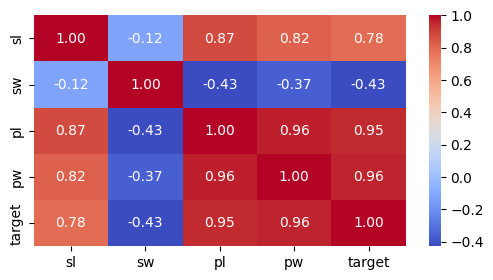

In [107]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

In [108]:
y = df['target']
X = df.drop(['target'],  axis=1)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(150, 4) (150,)


((120, 4), (30, 4), (120,), (30,))

In [109]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=1111)
kmeans.fit(X_train)
pred = kmeans.predict(X_train)
temp = pd.DataFrame()
temp['y'] = y_train
temp['pred_cluster'] = pred
temp.head(3)

,y,pred_cluster
15,0,1
79,1,0
4,0,1


In [110]:
temp.groupby(['pred_cluster']).value_counts()

pred_cluster  y
0             1    39
              2    11
1             0    40
2             2    29
              1     1
dtype: int64

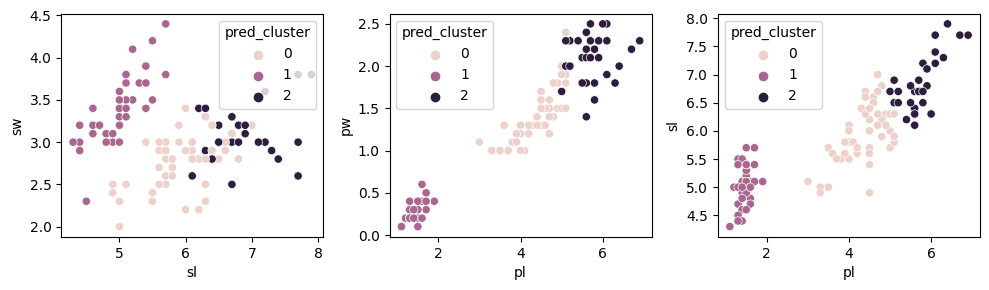

In [111]:
X_train['pred_cluster'] = temp['pred_cluster']

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.scatterplot(x='sl', y='sw', data=X_train, hue='pred_cluster')
plt.subplot(1,3,2)
sns.scatterplot(x='pl', y='pw', data=X_train, hue='pred_cluster')
plt.subplot(1,3,3)
sns.scatterplot(x='pl', y='sl', data=X_train, hue='pred_cluster')
plt.tight_layout()
plt.show()

In [112]:
px.scatter_3d(X_train, x="pl", y="pw", z="sl", size="sw", 
              color="pred_cluster", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [113]:
kmeans.cluster_centers_

array([[5.926     , 2.734     , 4.382     , 1.42      ],
       [5.        , 3.425     , 1.465     , 0.26      ],
       [6.82666667, 3.08666667, 5.75      , 2.10666667]])

In [148]:
kmeans.labels_

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 2])

In [146]:
pred

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 2])

In [115]:
kmeans.inertia_

66.1312

In [132]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_samples = silhouette_samples(X_train, pred)
score_samples.shape

(120,)

In [133]:
X_train['silhouette_coeff'] = score_samples
average_score = silhouette_score(X_train, pred, random_state=1111)
average_score

0.6754075291240469

In [134]:
X_train.head()

,sl,sw,pl,pw,pred_cluster,silhouette_coeff
15,5.7,4.4,1.5,0.4,1,0.653705
79,5.7,2.6,3.5,1.0,0,0.536229
4,5.0,3.6,1.4,0.2,1,0.850719
117,7.7,3.8,6.7,2.2,2,0.571162
118,7.7,2.6,6.9,2.3,2,0.554323


In [135]:
X_train['silhouette_coeff'].mean()

0.6754083374200943

In [136]:
np.mean(X_train['silhouette_coeff'])

0.6754083374200943

In [144]:
X_train.groupby(['pred_cluster']).mean()

,sl,sw,pl,pw,silhouette_coeff
pred_cluster,,,,,
0,5.926000,2.734000,4.382,1.420000,0.589146
1,5.000000,3.425000,1.465,0.260000,0.801843
2,6.826667,3.086667,5.750,2.106667,0.650599


In [141]:
X_train.groupby(['pred_cluster'])['silhouette_coeff'].mean()

pred_cluster
0    0.589146
1    0.801843
2    0.650599
Name: silhouette_coeff, dtype: float64

In [121]:
kmeans.labels_

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 2])

In [145]:
kmeans.inertia_

66.1312

In [1]:
range(3)

range(0, 3)